In [1]:
%matplotlib inline
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from polyphys.manage import organizer
from polyphys.manage import parser
from polyphys.visualize import tuner as ptuner
from polyphys.visualize import plotter
import seaborn as sns

/Users/amirhsi/opt/miniconda3/envs/polyLab/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/Users/amirhsi/opt/miniconda3/envs/polyLab/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/Users/amirhsi/opt/miniconda3/envs/polyLab/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


## Excluded-volume models

### Loading data
- Creating *allInOne* dataset: Do this step if there is no  **allInOne-vExc.csv** file, or it exist but has to bew updated.

In [ ]:
#vexc_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/vExc_Models/vExc_data/*.csv")
vexc_files = glob("/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Mathematica/vExc_Models/vExc_data/*.csv")
vexc_files = organizer.sort_filenames(vexc_files, fmts=['csv'])
vexc_df = []
limit = True # limit exclude volumes to --vexc_ath, vexc_athr]
for vexc_file in vexc_files:
    vexc_info = parser.ExcludedVolume(vexc_file[0])
    vexc_info.read_data()
    vexc_info.scale(limit=limit)
    vexc_info.add_model_info()
    vexc_df.append(vexc_info.vexc_df)
vexc_df = pd.concat(vexc_df, axis=0)
vexc_df.reset_index(inplace=True, drop=True)
if limit is True:
    vexc_df.to_csv('allInOne-vExc-limit.csv', index=False)
else:
    vexc_df.to_csv('allInOne-vExc.csv', index=False)

- DO this if you want to use an existing **allInOne-vExc.csv** file

In [ ]:
vexc_df = pd.read_csv('allInOne-vExc-limit.csv')

### Plots

In [ ]:
dcrowds = [0.2, 0.3, 0.6, 0.8, 1.0, 2.0, 4.0, 6.0]
plotter.p_vexc_models(
    vexc_df,
    dcrowds
)

In [ ]:
label_dict_long = {"vfrc_c":r"Volume fraction of crowders ($\phi_c$)",
             "vfrc_c_scaled":r"Rescaled volume fraction of crowders (${a\phi_c}/{a_c}$)",
             "exc_vol_scaled":r"Rescaled exc. volume ($v_{exc}/v_{athr}$)",
                  "r_scaled_max":r"Normalized chain size ($R/R_{0}$)",
                  "rho_c":r"Density of crowders ($\rho_c$) in $a^{-3}$"}

In [ ]:
dcrowds = [0.2, 0.8, 1.0, 2.0, 5.0]
plotter.p_vexc_dcrowds(
    vexc_df,
    dcrowds,
    fontsize=16
)

## Free-energy approach

### Loading data

In [ ]:
#vexc_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/vExc_Models/vExc_data/*.csv")
free_energy_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/Free energy approach/FreeEnergyApproach-VirialExpansion-allInOne-data/*.csv")
free_energy_files = organizer.sort_filenames(free_energy_files, fmts=['csv'])
phi_c_out_cap=0.6
free_energy_df = []
for free_energy_file in free_energy_files:
    free_energy_info = parser.FreeEnergyVirial(free_energy_file[0])
    free_energy_info.read_data()
    free_energy_info.scale(phi_c_out_cap)
    free_energy_info.add_model_info()
    free_energy_df.append(free_energy_info.r_chain_df)
free_energy_df = pd.concat(free_energy_df, axis=0)
free_energy_df.reset_index(inplace=True, drop=True)
free_energy_df.to_csv(
    f'allInOne-freeEnergyVirial-phiCrdLimit{phi_c_out_cap}.csv',
    index=False
)
col_names_mathematica = [
    'rhoOut', 'rhoIn', 'rChain', 'phiCout', 'phiCin','rScaled','tailModel',
    'vdepModel', 'nMon', 'dCyl', 'dCrowd'
]
free_energy_df.columns = col_names_mathematica
free_energy_df.to_csv(
    f'allInOne-freeEnergyVirial-phiCrdLimit{phi_c_out_cap}-Mathemaitca.csv',
    index=False
)

- DO this if you want to use an existing **allInOne-vExc.csv** file

In [2]:
phi_c_out_cap=0.45
chain_size = pd.read_csv(f'allInOne-freeEnergyVirial-phiCrdLimit{phi_c_out_cap}.csv')

### finding the uppoer limit on $\rho_o$ based on the limit on $\phi_o$

In [ ]:
chain_size.groupby(['nmon', 'dcyl', 'dcrowd']).max().reset_index()[['nmon', 'dcyl', 'dcrowd','rho_c_out']].to_csv(f"max_rho_c_out_for_phi_c_limit{phi_c_out_cap}.csv", index =False)

## Viz

In [63]:
cond_ha_lj = (chain_size['vdep_model']=='Ha') & (chain_size['tail_model']=='LJ')
chain_size_ha_lj = chain_size.loc[cond_ha_lj,:]

In [64]:
chain_size_ha_lj

,rho_c_out,rho_c_in,r_chain,phi_c_out,phi_c_in,r_scaled,tail_model,vdep_model,nmon,dcyl,dcrowd
0,0.0500,0.048157,37.480192,0.000209,0.000202,1.000000,LJ,Ha,80.0,5.0,0.2
1,0.0500,0.048157,37.480192,0.000209,0.000202,1.000000,LJ,Ha,80.0,5.0,0.2
2,0.1000,0.096313,37.477703,0.000419,0.000403,0.999934,LJ,Ha,80.0,5.0,0.2
3,0.1000,0.096313,37.477703,0.000419,0.000403,0.999934,LJ,Ha,80.0,5.0,0.2
4,0.1500,0.144469,37.475206,0.000628,0.000605,0.999867,LJ,Ha,80.0,5.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
68201,0.0020,0.001393,226.910150,0.226195,0.157492,0.843131,LJ,Ha,2000.0,31.0,6.0
68202,0.0024,0.001603,195.474540,0.271434,0.181248,0.726325,LJ,Ha,2000.0,31.0,6.0
68203,0.0028,0.001749,156.294368,0.316673,0.197810,0.580743,LJ,Ha,2000.0,31.0,6.0
68204,0.0032,0.001838,119.405747,0.361911,0.207874,0.443676,LJ,Ha,2000.0,31.0,6.0


In [99]:
%time
chain_size.loc[:,'phi_c_relative'] = chain_size.loc[:, 'phi_c_in'] / chain_size.loc[:, 'phi_c_out']
chain_size.loc[:,'confinement_rate'] = chain_size.loc[:, 'dcyl'] / chain_size.loc[:,'dcrowd']
chain_size.loc[:,'phi_c_out_scaled'] = chain_size.loc[:, 'phi_c_out'] / chain_size.loc[:, 'dcrowd']

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


In [65]:
%time
chain_size_ha_lj.loc[:,'phi_c_relative'] = chain_size_ha_lj.loc[:, 'phi_c_in'] / chain_size_ha_lj.loc[:, 'phi_c_out']
chain_size_ha_lj.loc[:,'confinement_rate'] = chain_size_ha_lj.loc[:, 'dcyl'] / chain_size_ha_lj.loc[:,'dcrowd']
chain_size_ha_lj.loc[:,'phi_c_out_scaled'] = chain_size_ha_lj.loc[:, 'phi_c_out'] / chain_size_ha_lj.loc[:, 'dcrowd']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


/var/folders/82/_3qwlp1x43x_h8vcnndfyv2w0000gn/T/ipykernel_16395/1923541333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chain_size_ha_lj.loc[:,'phi_c_relative'] = chain_size_ha_lj.loc[:, 'phi_c_in'] / chain_size_ha_lj.loc[:, 'phi_c_out']
/var/folders/82/_3qwlp1x43x_h8vcnndfyv2w0000gn/T/ipykernel_16395/1923541333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chain_size_ha_lj.loc[:,'confinement_rate'] = chain_size_ha_lj.loc[:, 'dcyl'] / chain_size_ha_lj.loc[:,'dcrowd']
/var/folders/82/_3qwlp1x43

In [95]:
comfinement_rate_count = chain_size_ha_lj['confinement_rate'].drop_duplicates().sort_values().count()
con_rate_colors = sns.color_palette("coolwarm", comfinement_rate_count)
con_rate_colors = dict(zip(chain_size_ha_lj['confinement_rate'].drop_duplicates().sort_values().values,con_rate_colors))

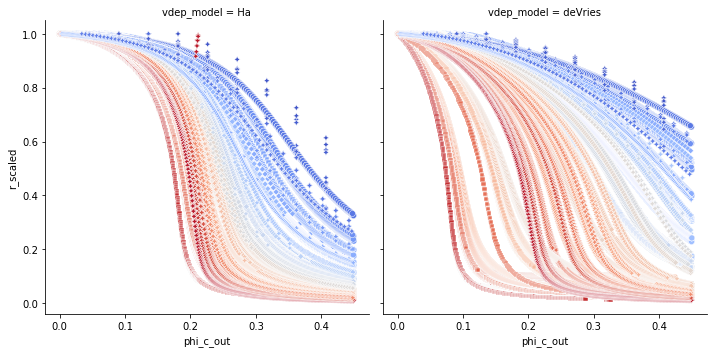

In [101]:
sns.relplot(
    data=chain_size,
    x='phi_c_out',
    y='r_scaled',
    hue='confinement_rate',
    style='nmon',
    col='vdep_model',
    kind='scatter',
    palette=con_rate_colors,
    col_wrap=2,
    legend=False
)

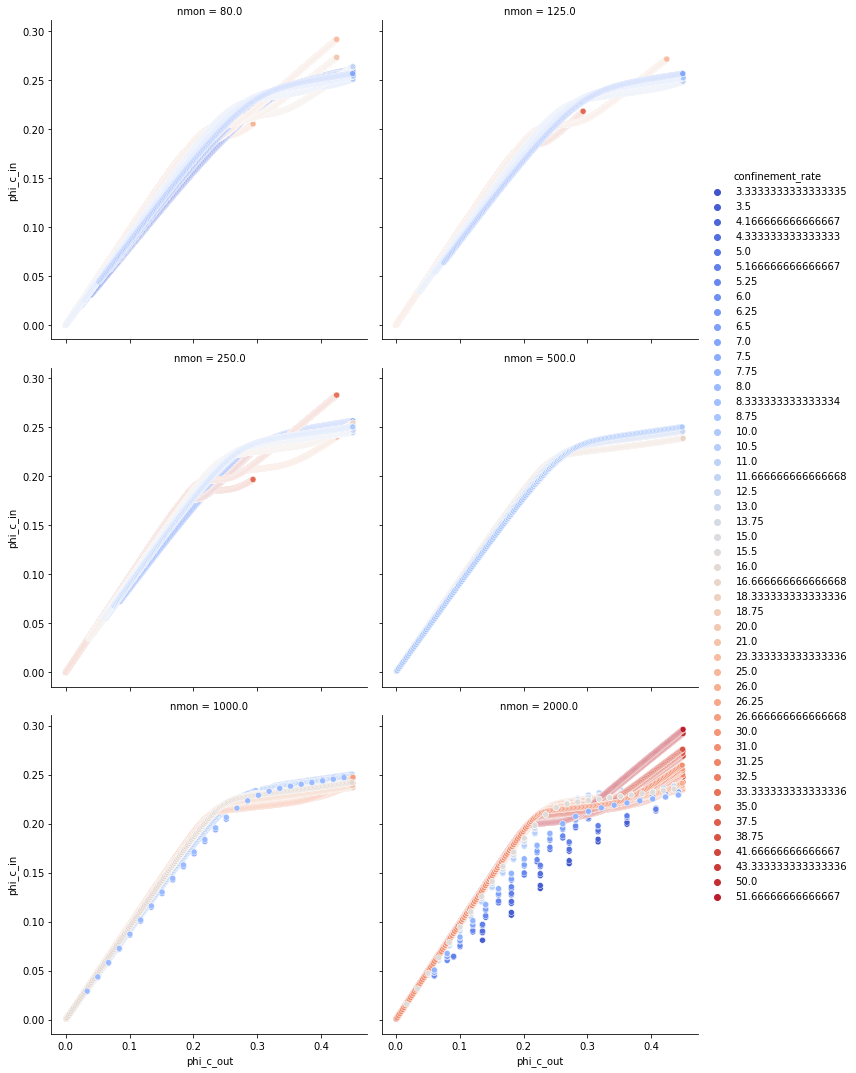

In [97]:
sns.relplot(
    data=chain_size_ha_lj,
    x='phi_c_out',
    y='phi_c_in',
    hue='confinement_rate',
    col='nmon',
    kind='scatter',
    palette=con_rate_colors,
    col_wrap=2
)

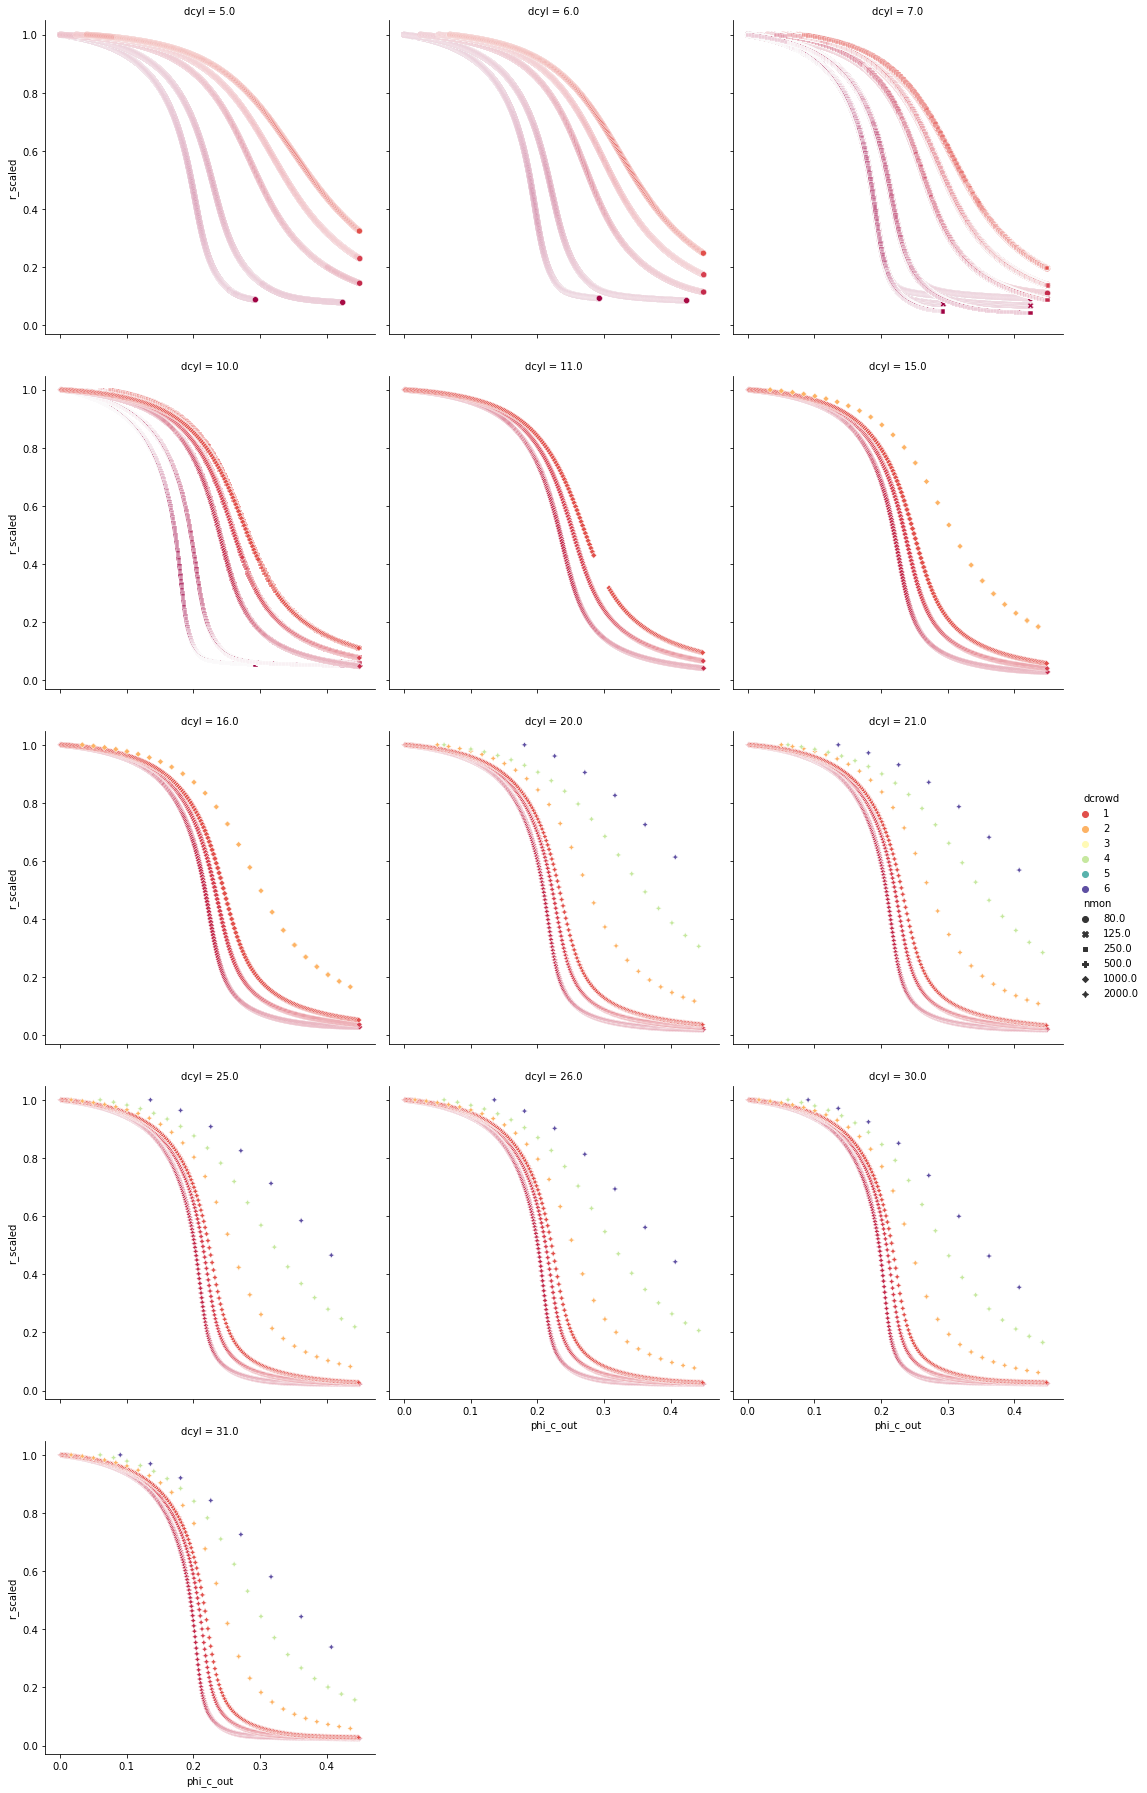

In [85]:
sns.relplot(
    data=chain_size_ha_lj,
    x='phi_c_out',
    y='r_scaled',
    hue='dcrowd',
    style='nmon',
    col='dcyl',
    kind='scatter',
    palette='Spectral',
    col_wrap=3
)

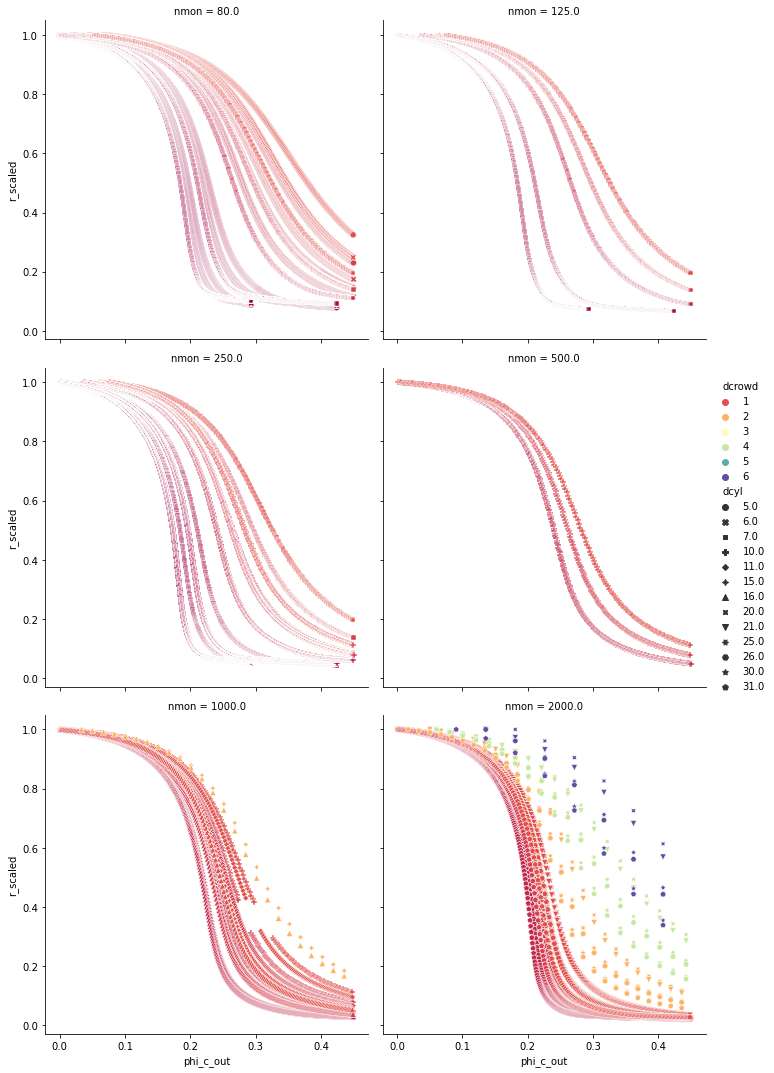

In [83]:
sns.relplot(
    data=chain_size_ha_lj,
    x='phi_c_out',
    y='r_scaled',
    hue='dcrowd',
    style='dcyl',
    col='nmon',
    kind='scatter',
    palette="Spectral",
    col_wrap=2
)